# Implementation k-means clustering from scratch and dendrogram

### Author: Sunwoo Choi

### Data
fashion_mnist from keras.datasets

In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot as plt

train_data, test_data = fashion_mnist.load_data()


In [ ]:
np.random.seed(1337)

In [ ]:
test_x = np.array(test_data[0])
test_label = np.array(test_data[1])

(5000, 784)
(5000,)


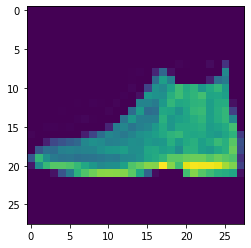

In [ ]:

plt.imshow(test_x[0], interpolation='nearest')

rows = np.where(test_label[:] == 0)
matched_x = test_x[rows]
x = matched_x[:500,:,:]
matched_y = test_label[rows]
y = matched_y[:500,]

for label in range(1,10):
  rows = np.where(test_label[:] == label)
  matched_x = test_x[rows]
  matched_y = test_label[rows]
  x = np.vstack((x,matched_x[:500,:,:]))
  y = np.hstack((y,matched_y[:500,]))


sample_size = x.shape[0]
dim = x.shape[1]*x.shape[2]

x= x.reshape((sample_size, dim))
print(x.shape)

print(y.shape)

In [ ]:
from sklearn.decomposition import PCA

fashion_pca = PCA(n_components=0.9)
fashion_pca.fit(x)

x_to_dim = fashion_pca.transform(x)

In [ ]:
x_to_dim[0]

array([1553.37913605, -617.03220782, -202.40916242,  157.09212783,
        249.72165857, 1031.93137674, -187.99988958,   12.29610866,
         16.88577438, -159.03398541,  174.08927294,  174.0661637 ,
        -60.64943523,  -64.90560984,  -49.98894081,   93.70263417,
        192.28359645,   45.13798111,  146.8966737 ,   67.92795501,
        137.1439537 ,  -52.52841318,  246.20020057,  -65.38336615,
        -98.05827142,  108.93428837,    9.82403902,   63.93654057,
          9.22609064,  -24.61743955,   67.96316898,   48.15204074,
         99.92636342,   43.095797  , -211.82462486,   73.27233941,
         45.90147022,  -17.37569993, -168.12427872,   26.60000942,
       -118.0643127 , -126.42228503,  105.90189169,   37.41503977,
        -50.94673996,  -57.33209001,  -25.75986805,   59.02159818,
        -25.73757692,  -81.27914139,  -57.5159792 ,   -6.22346725,
        119.79064152,  -33.06814611,   85.20239387,  -89.33547653,
        -35.59439595,   -3.60579752,   64.81384619,   12.82411

In [ ]:
# it calculate from one point to the all centers 
# and returns centeroid index which have the least distance from the point
def euclidean_distance(val, centers):
  distances = np.zeros(len(centers))
  for index in range(len(centers)):
    distances[index] = np.sum((val-centers[index])**2)
  
  return np.argmin(distances)

# k is number of clusters
# vals is the reduced components values 
# dim is dimensionality of vals
# iteration default value is 10
def lloyds_random(k, vals, dim, iterations=10):
  centers = np.random.rand(k, dim) * 200 - 100 # initial cluster centers with random selection
  counts = np.ones((k,1)) # counting number of points in cluster
  sumVal = np.zeros((k,dim)) # sum of distance from center to clustered points
  for repeat in range(iterations):
    for val in range(len(vals)):
      cluster_idx = euclidean_distance(val, centers) # clustering
      counts[cluster_idx][0] += 1 
      sumVal[cluster_idx] += val
  centers = sumVal/counts # change the center value with average coordinat of points within same cluster
  err = 0
  for val in range(len(vals)):
    idx = euclidean_distance(val, centers)
    err += np.sum((val-centers[idx])**2)
  return centers, np.sqrt(err)/len(vals) # using MSE



In [ ]:
K = 16
rand_err = []
# test number of clusters from 1 to 15
for k in range(1,K):
  centers, mse = lloyds_random(7, x_to_dim, x_to_dim.shape[1])
  rand_err.append(mse)


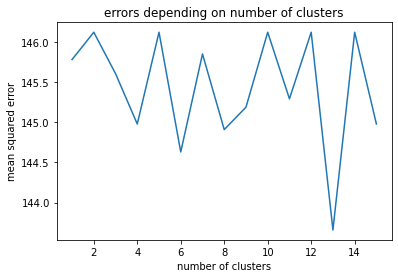

In [ ]:
k_vals = np.arange(1,K)

plt.plot(k_vals,rand_err)
plt.xlabel("number of clusters")
plt.ylabel("mean squared error")
plt.title("errors depending on number of clusters")
plt.show()

the max mean squared error and min mean square error has no big difference. even though in graph, it looks like significant decrease when number of clusters is 13.


### k-means++

for k-kmeans++ intialization, it is used one point in the compoenents array. Because, it is hard to figure out the specific range of values of dimension and it can cause error to choose the next coordination.

In [ ]:
def cal_dist(val, centers):
  return np.sqrt(np.sum((val-centers[index])**2)) #using euclidean distance for calculating distance

def lloyds_kmeans(k, vals, dim):
  centers = np.zeros((k, dim))
  centers[0] = vals[0] # initial cluster centers choosing one value instead of randomly created number
  num_cluster = 1
  
  while num_cluster < k: # iterate until fing k of clusters
    dist_prob = np.zeros(len(vals)) # set probs and sum dist every iteration
    sum_dist = 0
    for idx in range(len(vals)):
      dist = cal_dist(vals[idx], centers[num_cluster-1])
      dist_prob[idx] = dist
      sum_dist += dist
    dist_prob /= sum_dist
    min_idx = np.argmax(dist_prob)
    centers[num_cluster] = vals[min_idx]
    num_clust += 1
  err = 0
  for val in range(len(vals)):
    idx = euclidean_distance(val, centers)
    err += np.sum((val-centers[idx])**2)
  return centers, np.sqrt(err)/len(vals) # using MSE


In [ ]:
K = 16
rand_err = []
for k in range(1,K):
  centers, mse = lloyds_random(7, x_to_dim, x_to_dim.shape[1])
  rand_err.append(mse)


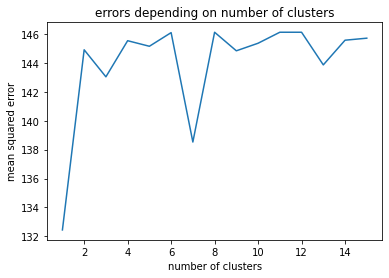

In [ ]:
k_vals = np.arange(1,K)

plt.plot(k_vals,rand_err)
plt.xlabel("number of clusters")
plt.ylabel("mean squared error")
plt.title("errors depending on number of clusters")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

clustering_with_avg = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='average', distance_threshold=0).fit(x_to_dim, y)
clustering_with_single = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='single', distance_threshold=0).fit(x_to_dim, y)

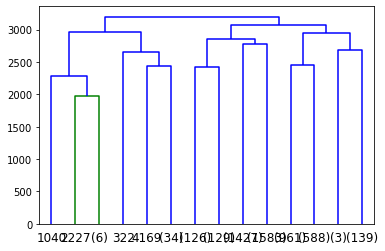

In [ ]:
# plotting dendrogram is referenced from 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
plot_dendrogram(clustering_with_avg, truncate_mode='level', p=3)
plt.show()

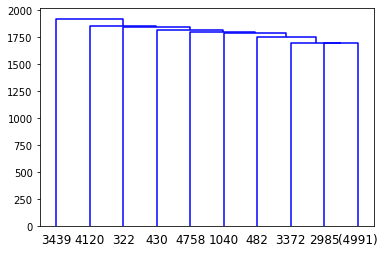

In [ ]:
plot_dendrogram(clustering_with_single, truncate_mode='level', p=8)
plt.show()

This cluster shows that each nodes are very seperate due to the height of the nodes. when nodes are combined, the height becomes very small, it means that the disimalrity of combined nodes are small.